In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [12]:
df = pd.read_csv(os.path.join("Dataset For Model",'Heart Disease Data.csv'), header = 0)
df['Sex'] = df['Sex'].map({'Female':0, 'Male':1 })
df['Chest Pain Type'] = df['Chest Pain Type'].map({'No Pain':0, 'Typical Angina':1, 'Atypical Angina':2, 'Non-Anginal Pain':3, 'Asymptomatic':3})
df['Fasting Blood Sugar'] = df['Fasting Blood Sugar'].map({'< 120 mg/dl':0, '> 120 mg/dl':1})
df['Resting Electrocardiographic Results'] = df['Resting Electrocardiographic Results'].map({'Normal':1, 'ST-T Change':2, 'Left Ventricular Hypertrophy':3})
df['Exercise Induced Angina'] = df['Exercise Induced Angina'].map({'No Angina':0, 'Angina':1})
df['The slope of the peak exercise ST segment'] = df['The slope of the peak exercise ST segment'].map({'Down Slope':0 ,'Flat Slope':1, 'Up Slope':2})
df['Thallium Test Result'] = df['Thallium Test Result'].map({'Normal':3, 'Reversible Defect':2, 'Fixed Defect':1, 'Unknown':0})
df['Thallium Test Result'] = df['Thallium Test Result'].fillna(df['Thallium Test Result'].mean())
df['Result'] = df['Result'].map({'Heart Disease':1, 'No Heart Disease':0})

## K Nearest Neighbors

Accuracy for training set for KNeighborsClassifier = 0.92
Accuracy for test set for KNeighborsClassifier = 0.73


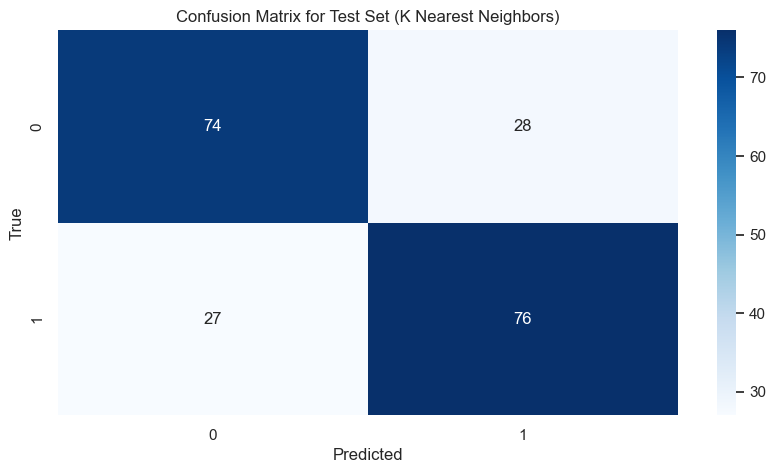

In [21]:
# Tách dữ liệu thành X và Y
X = df.drop(columns=['target','age_group']).values  # Lấy tất cả các cột trừ cột target, age_group
Y = df['target'].values  # Chỉ lấy cột target

# Chia dữ liệu
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Tính ma trận nhầm lẫn
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Tính độ chính xác
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(Y_test), 2)

# In kết quả accuracy
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))

# Hiển thị Confusion Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (K Nearest Neighbors)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Support Vector Machines

Accuracy for training set for SVM = 0.92
Accuracy for test set for SVM = 0.89


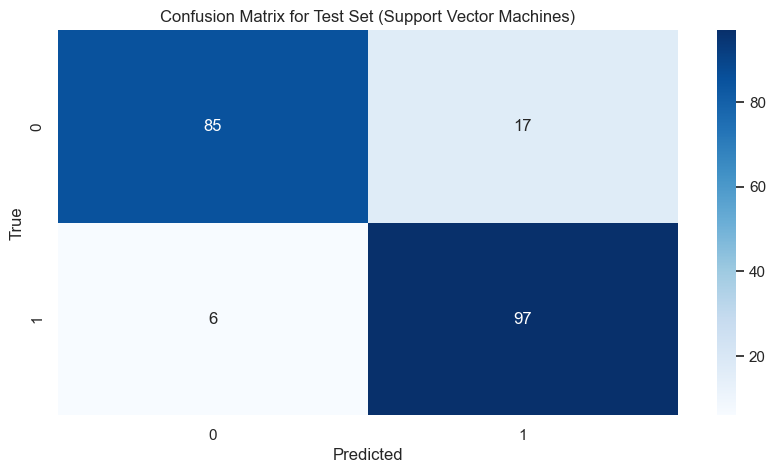

In [22]:
X = df.drop(columns=['target','age_group']).values  # Lấy tất cả các cột trừ cột target, age_group
Y = df['target'].values  # Chỉ lấy cột target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình SVM
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Tính độ chính xác
accuray_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(Y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(Y_test), 2)

# In kết quả accuracy
print('Accuracy for training set for SVM = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVM = {}'.format(accuracy_for_test))

# Hiển thị Confusion Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (Support Vector Machines)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Naive Bayes

Accuracy for training set for Naive Bayes = 0.92
Accuracy for test set for Naive Bayes = 0.89


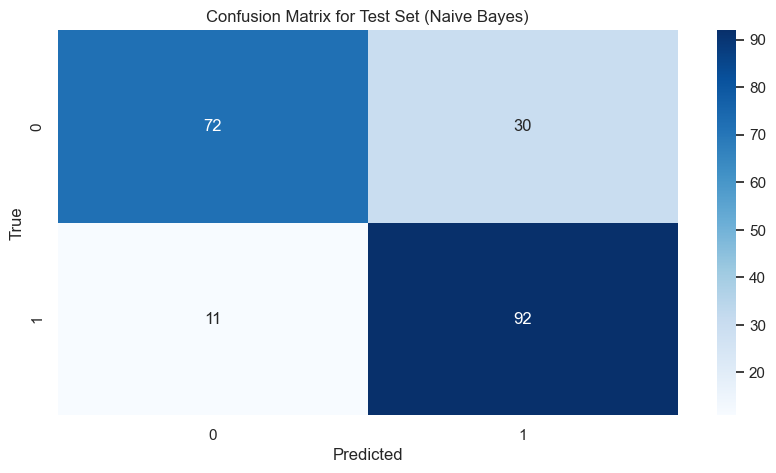

In [23]:
X = df.drop(columns=['target','age_group']).values  # Lấy tất cả các cột trừ cột target, age_group
Y = df['target'].values  # Chỉ lấy cột target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Tính độ chính xác
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# In kết quả accuracy
print('Accuracy for training set for Naive Bayes = {}'.format(accuracy_for_train))
print('Accuracy for test set for Naive Bayes = {}'.format(accuracy_for_test))

# Hiển thị Confusion Matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (Naive Bayes)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Decision Tree

Accuracy for training set for Decision Tree = 1.00
Accuracy for test set for Decision Tree = 0.99


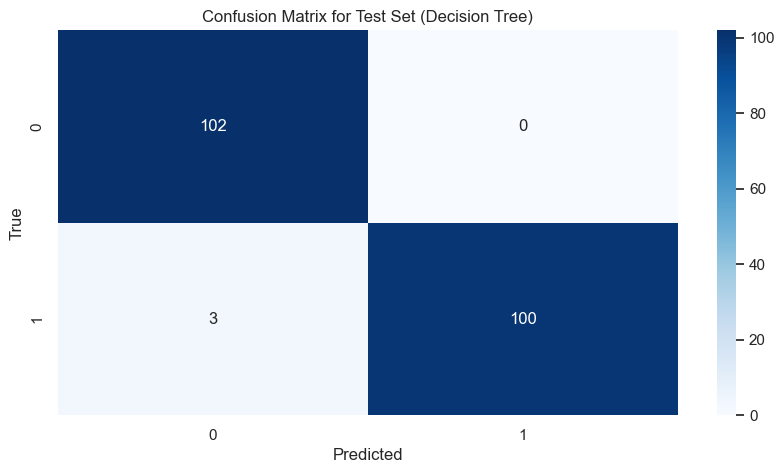

In [24]:
X = df.drop(columns=['target','age_group']).values  # Lấy tất cả các cột trừ cột target, age_group
Y = df['target'].values  # Chỉ lấy cột target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Decision Tree với các tham số được cung cấp
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, random_state=42)
model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Tính độ chính xác
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# In kết quả
print('Accuracy for training set for Decision Tree = {:.2f}'.format(accuracy_train))
print('Accuracy for test set for Decision Tree = {:.2f}'.format(accuracy_test))

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (Decision Tree)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



## Adaboost

c:\Users\QuySech\anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for AdaBoost = 0.95
Accuracy for test set for AdaBoost = 0.88


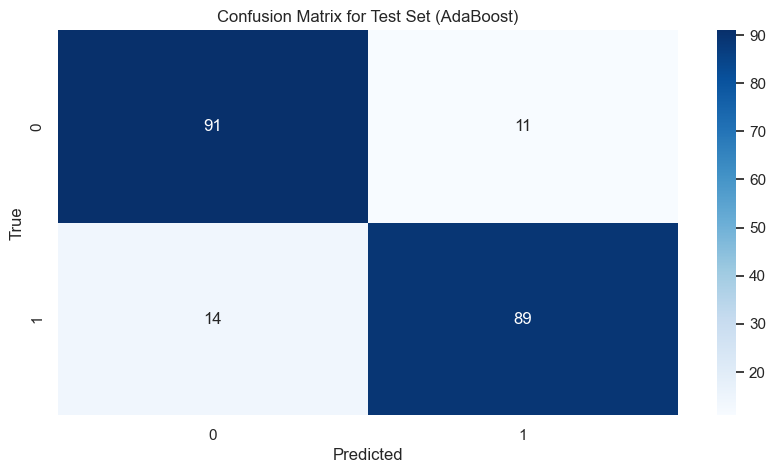

In [25]:
X = df.drop(columns=['target','age_group']).values  # Lấy tất cả các cột trừ cột target, age_group
Y = df['target'].values  # Chỉ lấy cột target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình AdaBoost với các tham số được cung cấp
model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)
model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Tính độ chính xác
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# In kết quả
print('Accuracy for training set for AdaBoost = {:.2f}'.format(accuracy_train))
print('Accuracy for test set for AdaBoost = {:.2f}'.format(accuracy_test))

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (AdaBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Gradient Boosting

Accuracy for training set for Gradient Boosting = 0.98
Accuracy for test set for Gradient Boosting = 0.93


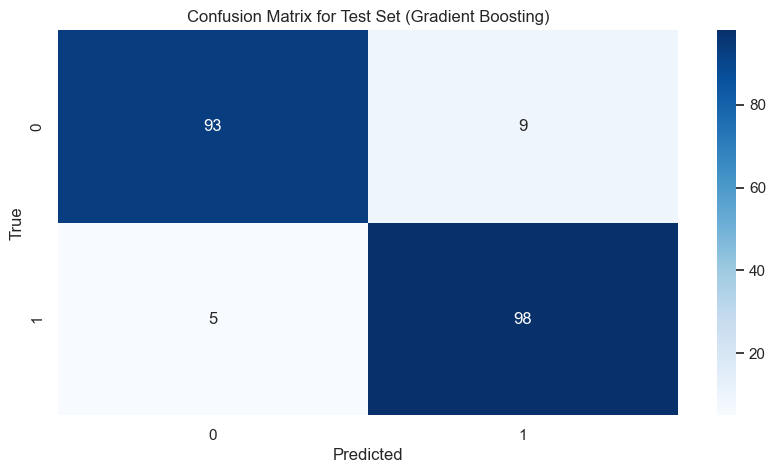

In [26]:
X = df.drop(columns=['target','age_group']).values  # Lấy tất cả các cột trừ cột target, age_group
Y = df['target'].values  # Chỉ lấy cột target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Gradient Boosting với các tham số được cung cấp
model = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42)
model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

#Tính độ chính xác
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# In kết quả
print('Accuracy for training set for Gradient Boosting = {:.2f}'.format(accuracy_train))
print('Accuracy for test set for Gradient Boosting = {:.2f}'.format(accuracy_test))

# Hiển thị ma trận nhầm lẫn cho tập test
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (Gradient Boosting)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## XGboost

Accuracy for training set for XGBoost = 1.00
Accuracy for test set for XGBoost = 0.99


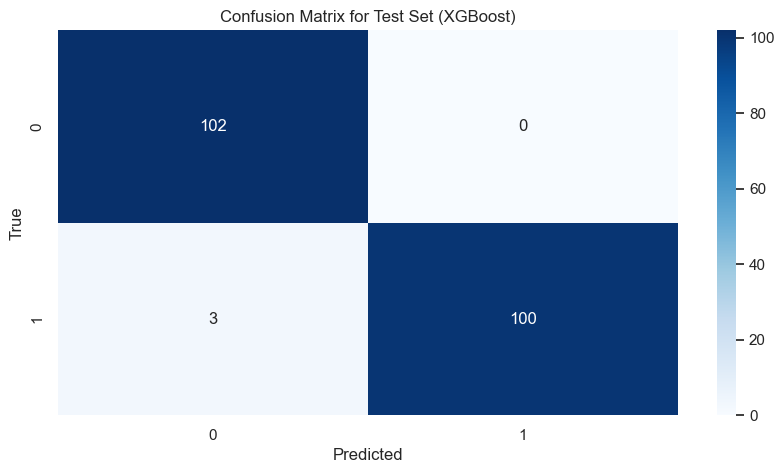

In [29]:
# Chọn các đặc trưng đầu vào và biến mục tiêu
X = df.drop(columns=['target', 'age_group']).values  # Xóa cột target và age_group
Y = df['target'].values  # Chỉ giữ cột target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Huấn luyện mô hình XGBoost với các tham số đã cung cấp
model = xgb.XGBClassifier(objective="binary:logistic", random_state=42, n_estimators=100)
model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Tính độ chính xác
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# In kết quả
print('Accuracy for training set for XGBoost = {:.2f}'.format(accuracy_train))
print('Accuracy for test set for XGBoost = {:.2f}'.format(accuracy_test))

# Hiển thị ma trận nhầm lẫn cho tập test
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (XGBoost)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Stacking

c:\Users\QuySech\anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\QuySech\anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\QuySech\anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\QuySech\anaconda3\envs\python3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit

Accuracy for training set for Stacking = 1.00
Accuracy for test set for Stacking = 0.99


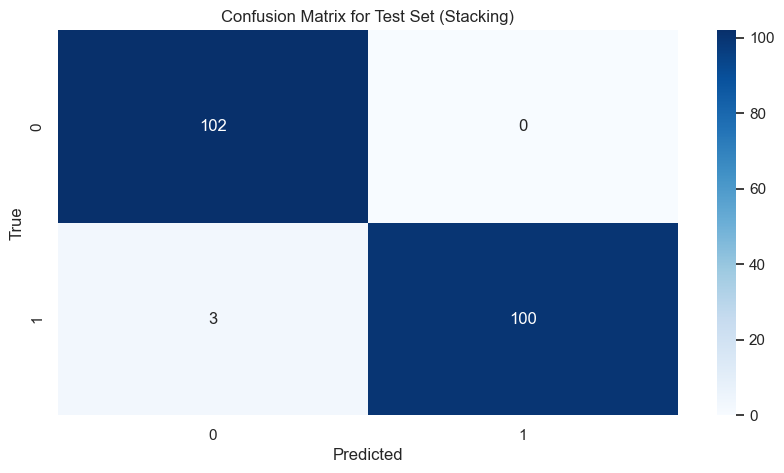

In [17]:
# Chọn các đặc trưng đầu vào và biến mục tiêu
X = df.drop(columns=['target', 'age_group']).values  # Xóa cột target và age_group
Y = df['target'].values  # Chỉ giữ cột target

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Định nghĩa các mô hình cơ sở (base models)
base_models = [
    ('svm', SVC(kernel='rbf', probability=True, random_state=42)),
    ('decision_tree', DecisionTreeClassifier(criterion='gini', max_depth=10, random_state=42)),
    ('naive_bayes', GaussianNB()),
    ('gradient_boost', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=50, learning_rate=1.0, random_state=42))
]

# Định nghĩa mô hình meta (meta-model) là Logistic Regression
meta_model = LogisticRegression()

# Xây dựng mô hình Stacking
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Huấn luyện mô hình Stacking
stacking_model.fit(X_train, Y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
Y_pred_train = stacking_model.predict(X_train)
Y_pred_test = stacking_model.predict(X_test)

# Tính ma trận nhầm lẫn và độ chính xác
cm_train = confusion_matrix(Y_train, Y_pred_train)
cm_test = confusion_matrix(Y_test, Y_pred_test)

# Tính độ chính xác
accuracy_train = accuracy_score(Y_train, Y_pred_train)
accuracy_test = accuracy_score(Y_test, Y_pred_test)

# In kết quả
print('Accuracy for training set for Stacking = {:.2f}'.format(accuracy_train))
print('Accuracy for test set for Stacking = {:.2f}'.format(accuracy_test))
    
# Hiển thị ma trận nhầm lẫn cho tập test
plt.figure(figsize=(10, 5))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Test Set (Stacking)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()